# Итоговая работа по курсу «Python и математика для анализа данных»

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


### 1. Загрузить файл hr.csv

In [2]:
df_hr = pd.read_csv('HR.csv')
df_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
df_hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


**Описание данных**

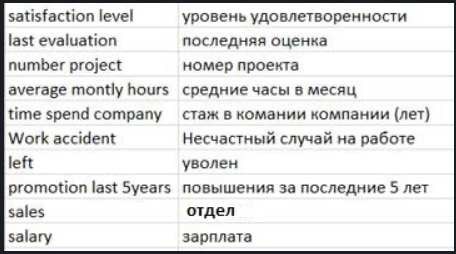

In [3]:
from IPython.display import Image
Image("metrix.png")

In [9]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


* Общее кол-во записей: 14999
* 10 колонок
* все колонки заполнены данными

### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [11]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Для всех колонок значение mean (ср.значение) и второго квантиля 50% (медиана) близки между собой, можно проверить распределения на нормальность.

In [12]:
#мат.ожидание (среднее значение)
df_hr.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [134]:
#STANDART DEVIATION стандартное отклонение (среднее отклонение значений от сред.значения)
df_hr.describe().loc['std':'std',:]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281


Значения атрибута 'average_montly_hours' (сред.часы в мес) довольно сильно отклоняются от сред.значения (Std около 50). 
У остальных атрибутов достаточно маленькое сред.кв.отклонение, значит данные имеют значения близкие к средним.

In [13]:
#MEDIAN медиана
df_hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [14]:
#min значения
df_hr.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [15]:
#max значения
df_hr.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [130]:
#MODE мода
df_hr.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


Чаще всего встречаются записи о сотрудниках отдела 'sales' (отдел продаж) и с зарплатой низкого уровня 'low'.

### **Посмотрим данные на наличие выбросов:**

Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. 
* Коробка показывает интерквантильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) процентили. 
* Черта внутри коробки обозначает медиану распределения. 
* Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 - интерквантильный размах. 
* Точками на графике обозначаются выбросы (outliers) - те значения, которые не вписываются в промежуток значений, заданный усами графика

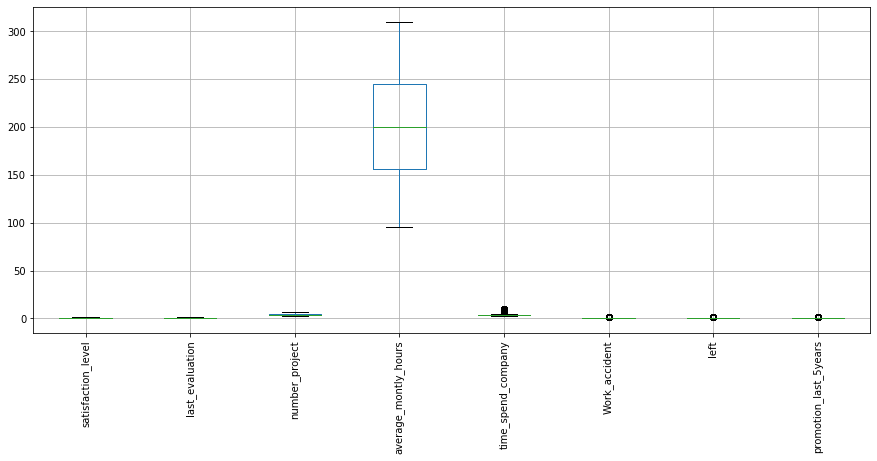

In [25]:
boxplot = df_hr.boxplot(figsize=(15,6), rot=90)

Атрибут 'average_montly_hours' (сред.часы в мес) отличается по значениям от других, поэтому посмотрим его отдельно. 

выбросов не наблюдается

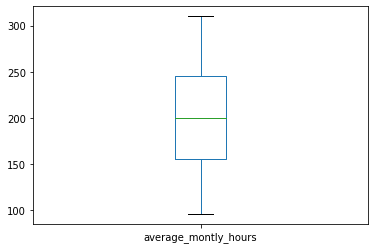

In [26]:
df_hr['average_montly_hours'].plot(kind='box')

Посмотрим boxplot атрибутов 'satisfaction_level', 'last_evaluation', 'number_project'

выбросов не наблюдается

In [6]:
df_small = df_hr.filter(items=['satisfaction_level', 'last_evaluation', 'number_project'])
df_small.head()

,satisfaction_level,last_evaluation,number_project
0,0.38,0.53,2
1,0.80,0.86,5
2,0.11,0.88,7
3,0.72,0.87,5
4,0.37,0.52,2


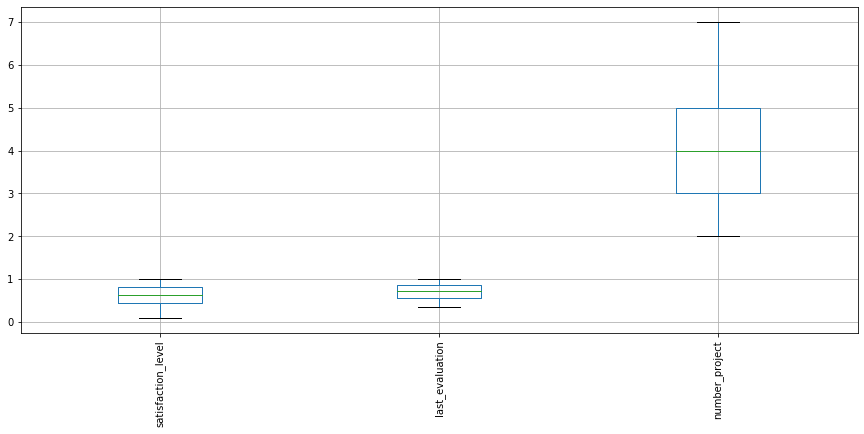

In [7]:
boxplot_small = df_small.boxplot(figsize=(15,6), rot=90)

Посмотрим boxplot атрибутов 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'

наблюдаются единичные выбросы

In [8]:
df_very_small = df_hr.filter(items=['time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'])
df_very_small.head()

,time_spend_company,Work_accident,left,promotion_last_5years
0,3,0,1,0
1,6,0,1,0
2,4,0,1,0
3,5,0,1,0
4,3,0,1,0


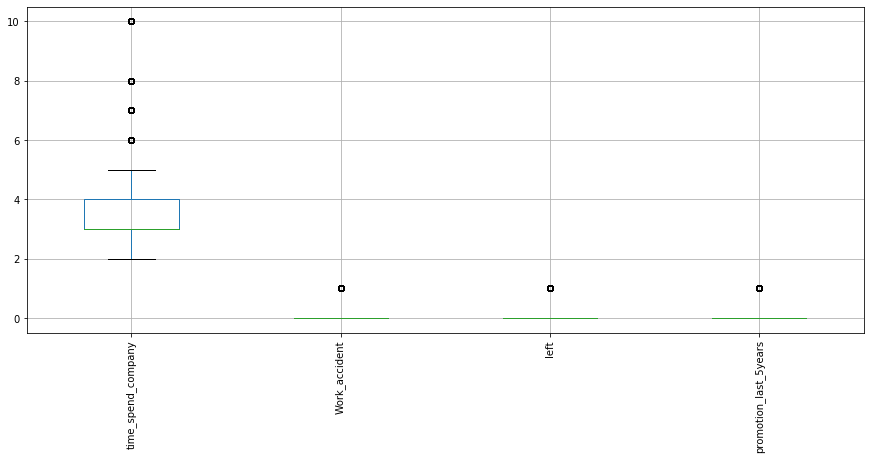

In [9]:
boxplot_very_small = df_very_small.boxplot(figsize=(15,6), rot=90)

Посмотрим boxplot каждого атрибута по-отдельности

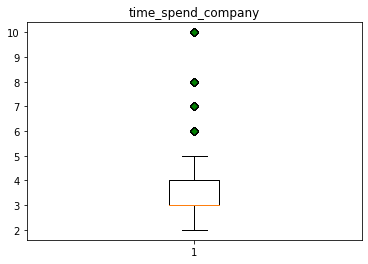

In [11]:
#'time_spend_company' - стаж в компании(лет)
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('time_spend_company')
ax1.boxplot(df_hr['time_spend_company'], flierprops=green_diamond)
plt.show()

In [142]:
df_hr[ df_hr['time_spend_company']>5 ]['time_spend_company'].value_counts()

6     718
10    214
7     188
8     162
Name: time_spend_company, dtype: int64

это распределение сотрудников по стажу (6,7,8,10 лет), оставим и не будем считать выбросами

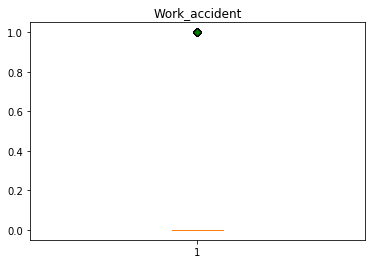

In [12]:
#'Work_accident' - несчастный случай на работе
green_diamond = dict(markerfacecolor='g', marker='D')
fig2, ax2 = plt.subplots()
ax2.set_title('Work_accident')
ax2.boxplot(df_hr['Work_accident'], flierprops=green_diamond)
plt.show()

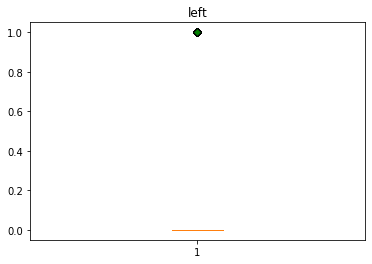

In [13]:
#'left' - уволен или работает
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('left')
ax3.boxplot(df_hr['left'], flierprops=green_diamond)
plt.show()

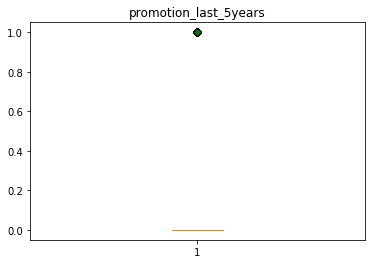

In [14]:
#'promotion_last_5years' - повышения за последние 5 лет
green_diamond = dict(markerfacecolor='g', marker='D')
fig4, ax4 = plt.subplots()
ax4.set_title('promotion_last_5years')
ax4.boxplot(df_hr['promotion_last_5years'], flierprops=green_diamond)
plt.show()

для 'Work_accident', 'left', 'promotion_last_5years' тоже не будем считать выбросами (принимают значения 0 или 1)

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

In [139]:
df_hr_num = df_hr.iloc[:, [0,1,3,4,5,6,7]]
df_hr_num.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,157,3,0,1,0
1,0.80,0.86,262,6,0,1,0
2,0.11,0.88,272,4,0,1,0
3,0.72,0.87,223,5,0,1,0
4,0.37,0.52,159,3,0,1,0


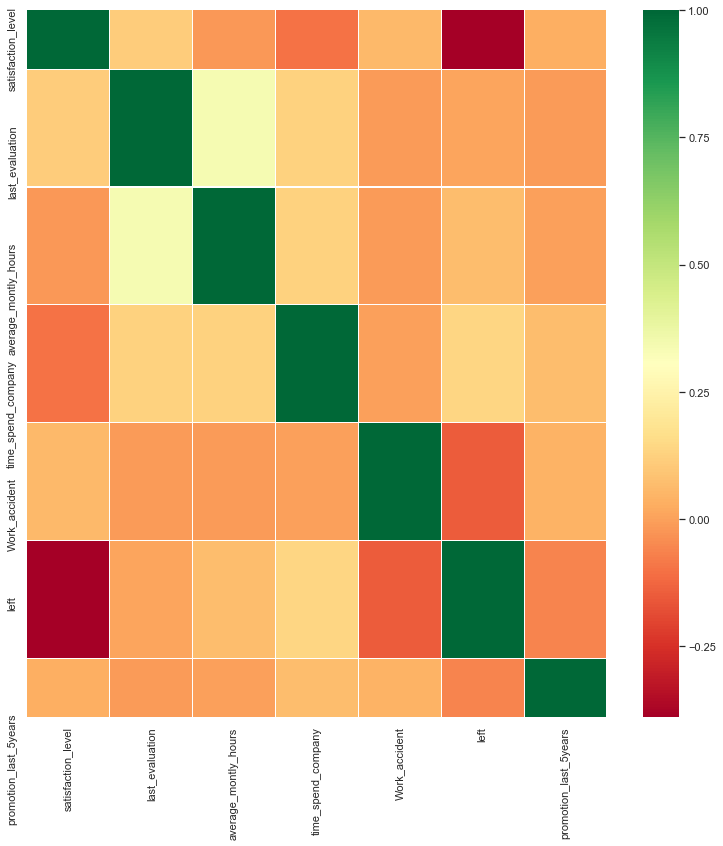

In [140]:
#Построим матрицу корреляций:
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df_hr_num.corr(), decimals=2)

sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

наблюдается отриц. корреляция атрибутов 'left' и'satisfaction_level'

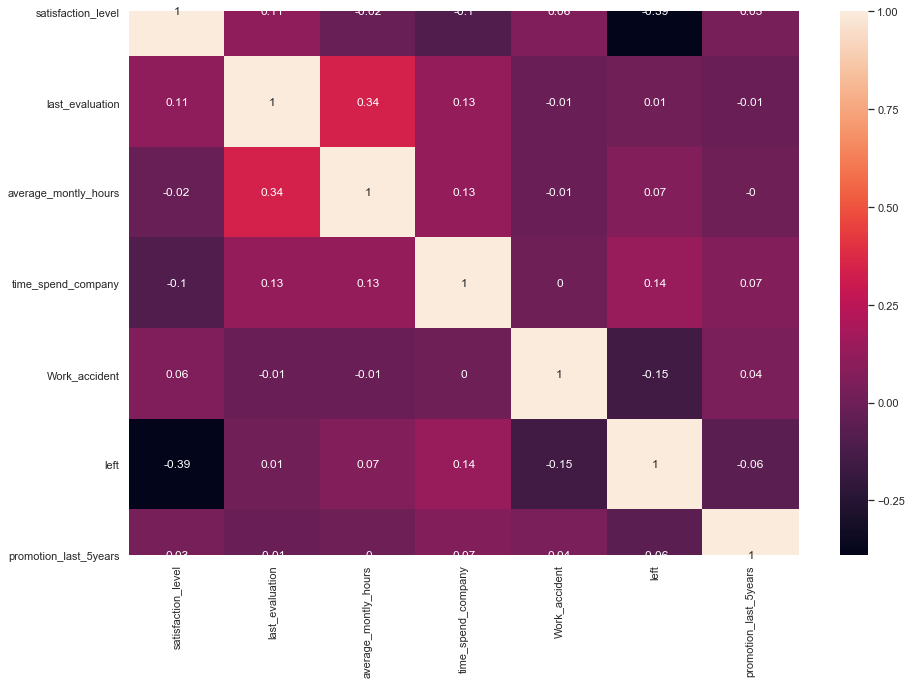

In [141]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr, annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [142]:
#матрица корреляции
corr

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.34,0.13,-0.01,0.01,-0.01
average_montly_hours,-0.02,0.34,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.00,0.07,0.04,-0.06,1.00


### 4. Визуализировать несколько взаимосвязей между переменными.

#### Построим попарные графики для выборок, а также частотные графики на главной диагонали, для всех атрибутов.

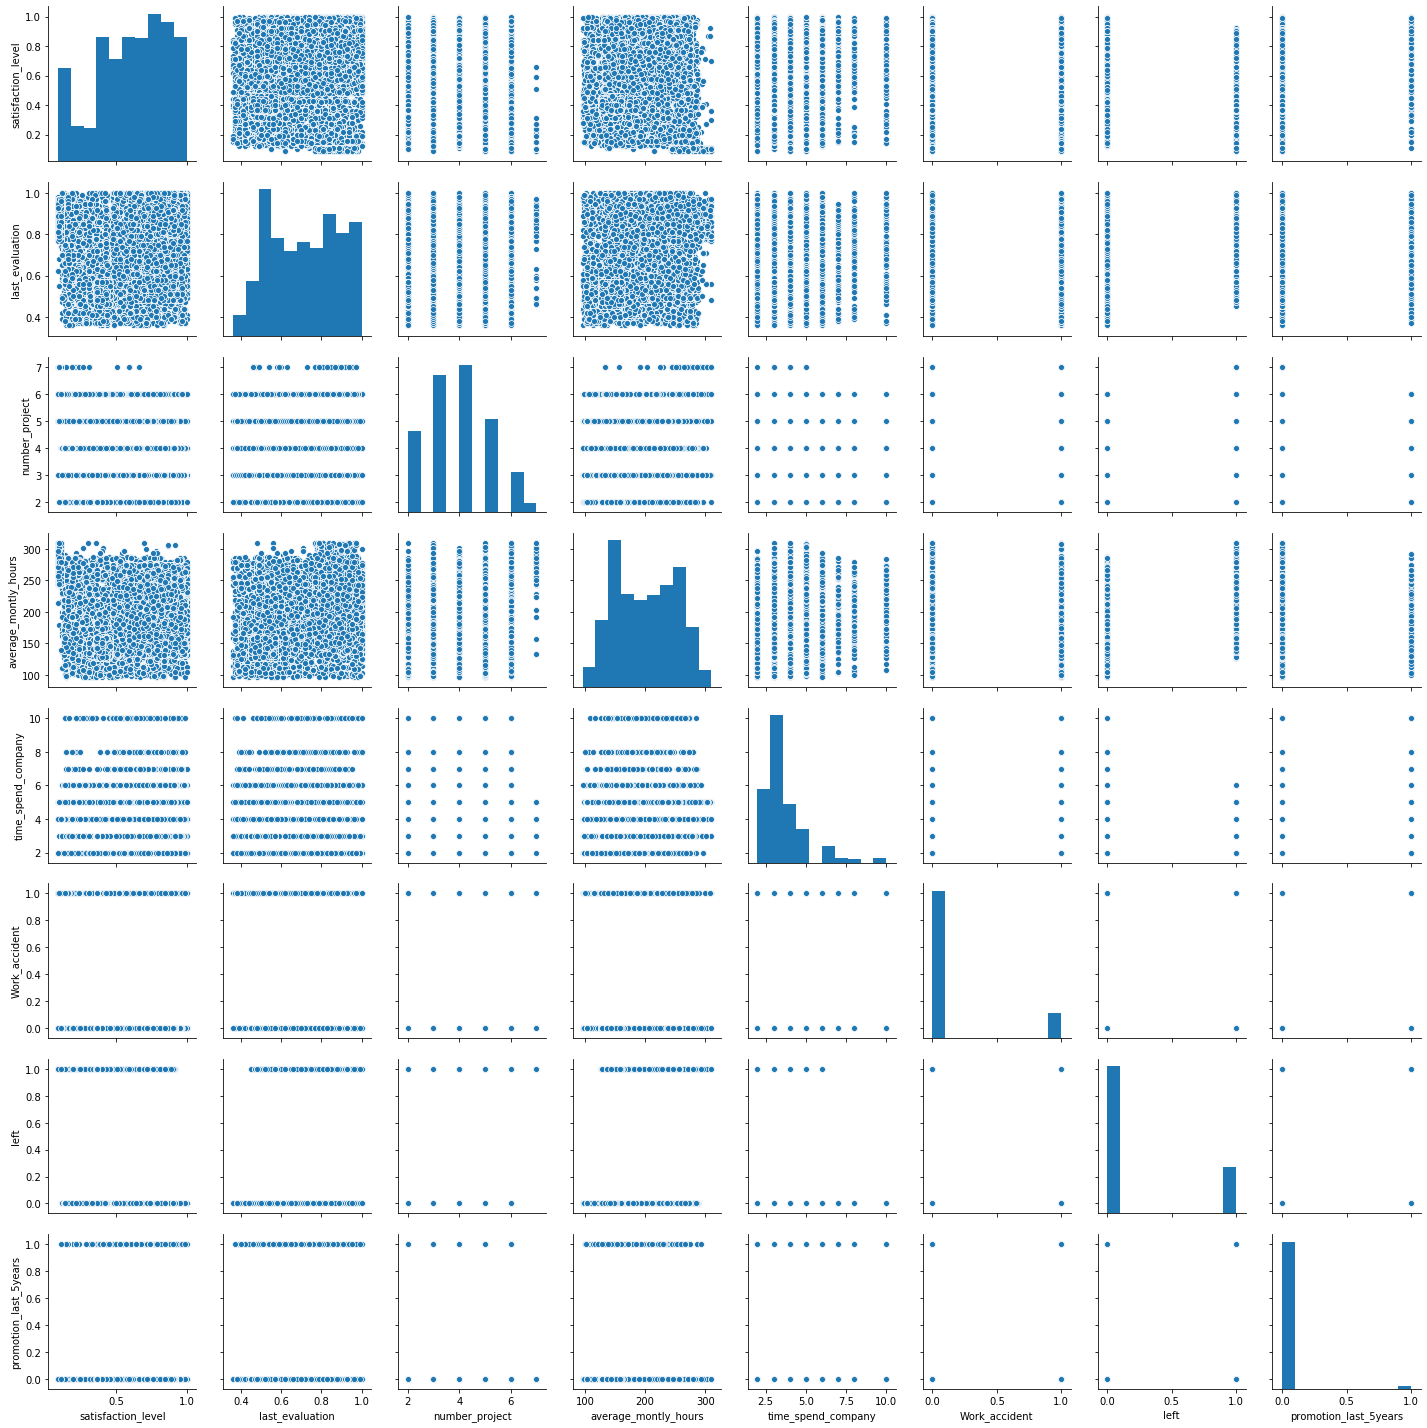

In [7]:
sns.pairplot(df_hr, kind="scatter")

#### Проведем классификационный анализ всех выборок попарно для классов - работающие сотрудники и покинувшие компанию:

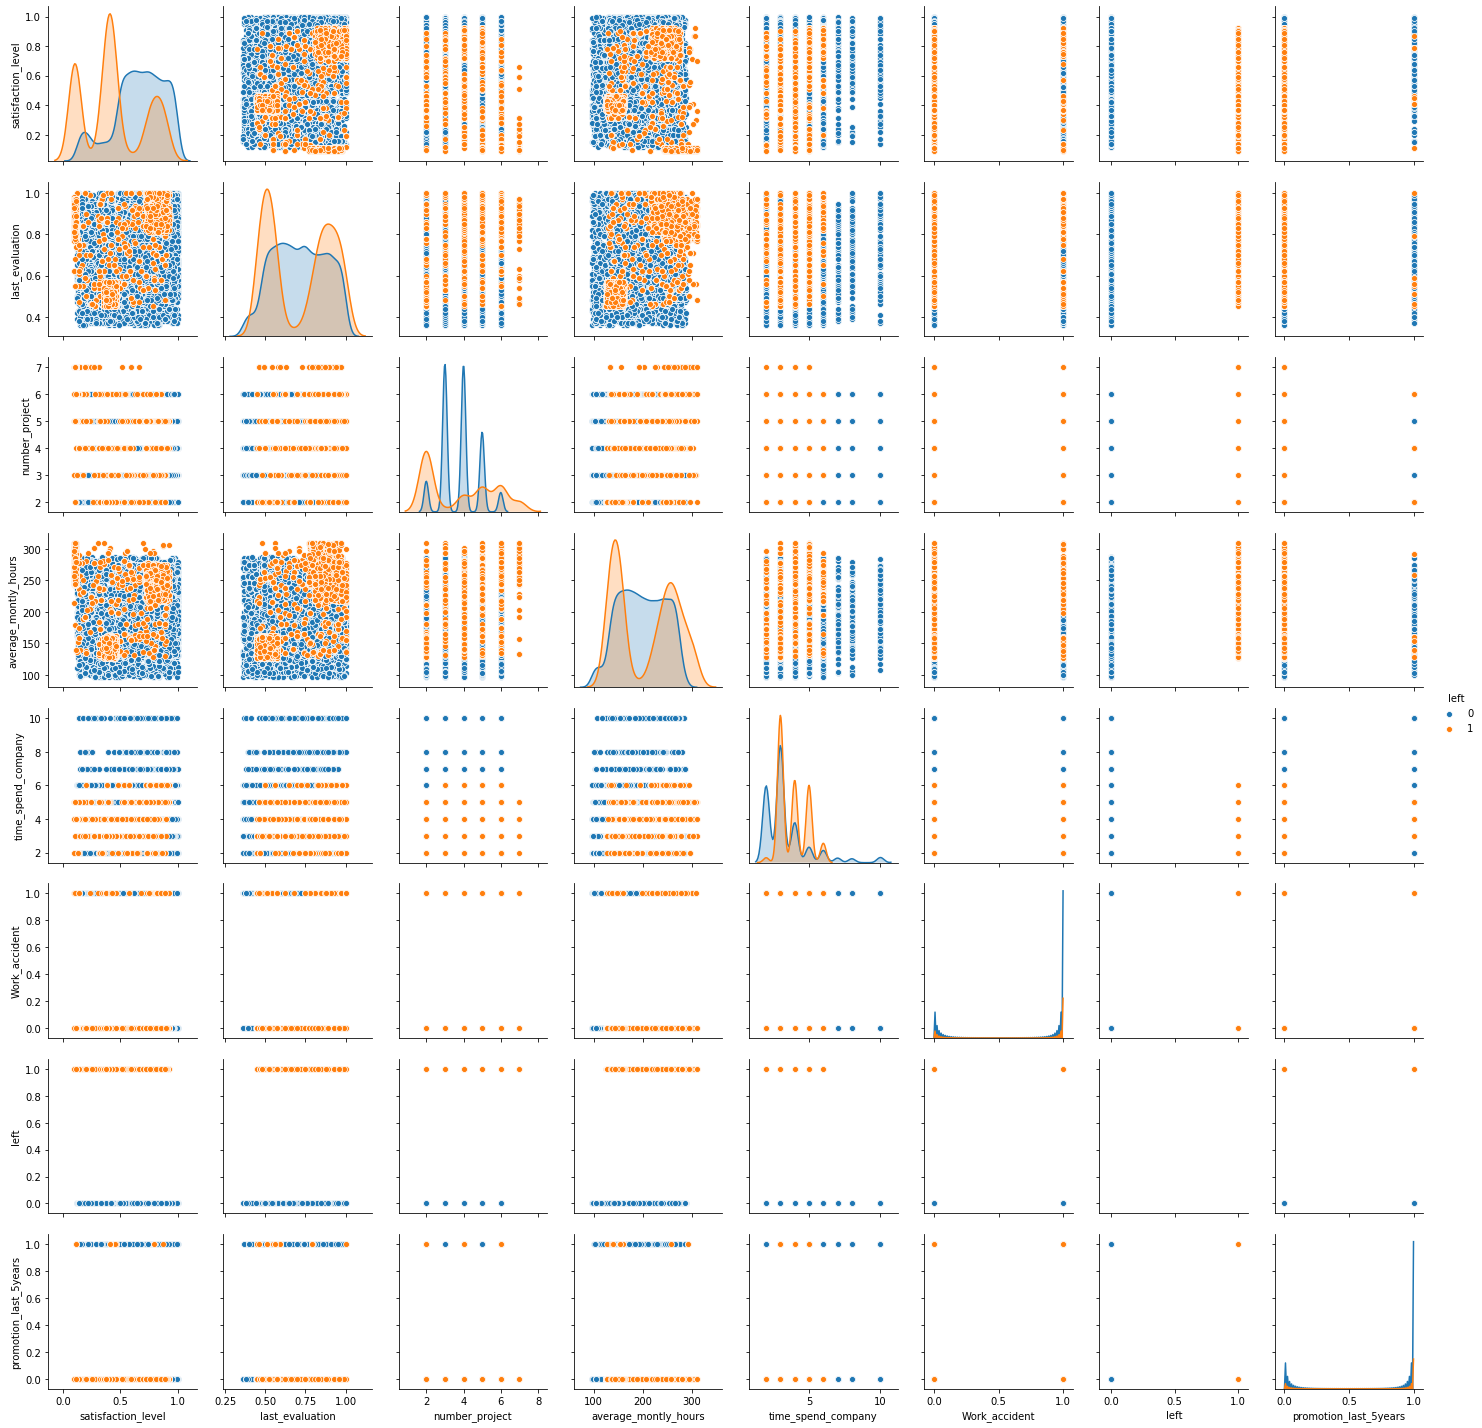

In [9]:
fig = sns.pairplot(data=df_hr, hue='left')
plt.show()

Разделим данные на 2 класса - работающие сотрудники и покинувшие компанию

In [49]:
#работающие
df_work = df_hr[ df_hr['left']==0 ] 

In [50]:
#покунувшие компанию
df_left = df_hr[ df_hr['left']==1 ] 

#### Проверять, связаны ли две выборки, то есть имеют ли данные выборки зависимость будем, используя 

**Коэффициент корреляции Пирсона** проверяет, имеют ли две выборки линейную связь.

- H0: две выборки независимы (некоррелированы)
- H1: существует зависимость между выборками.

#### Визуализируем связь атрибутов 'average_montly_hours'(сред.ч. в мес.) и 'satisfaction_level'(уровень удовлетворенности)

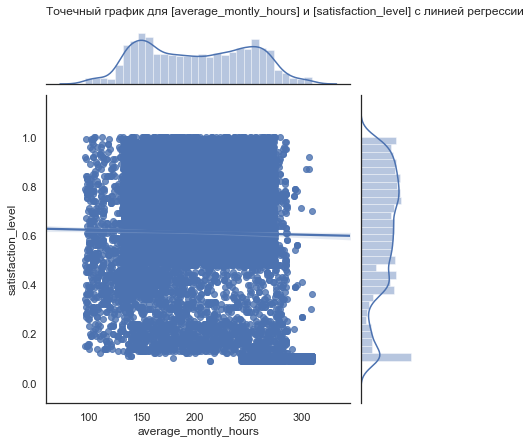

In [75]:
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_hr['average_montly_hours'], y=df_hr['satisfaction_level'], data=df_hr, kind='reg')
plt.title('Точечный график для [average_montly_hours] и [satisfaction_level] с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

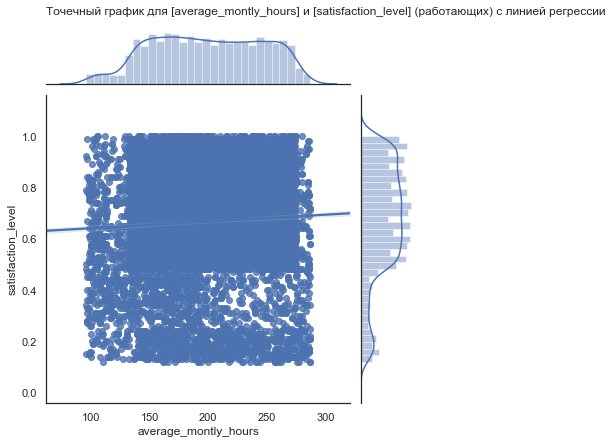

In [76]:
#работающие
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_work['average_montly_hours'], y=df_work['satisfaction_level'], data=df_work, kind='reg')
plt.title('Точечный график для [average_montly_hours] и [satisfaction_level] (работающих) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

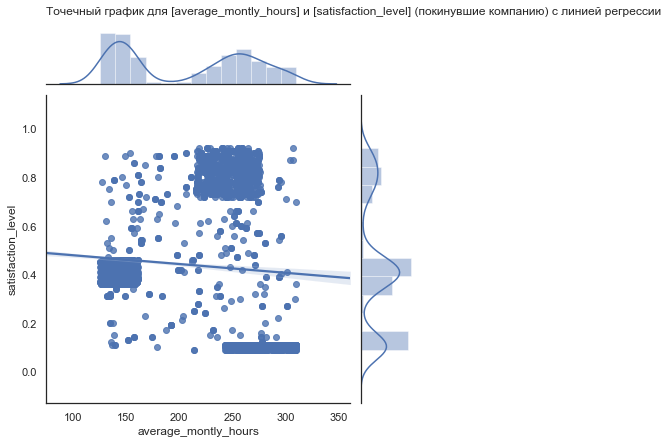

In [77]:
#покинувшие компанию
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_left['average_montly_hours'], y=df_left['satisfaction_level'], data=df_left, kind='reg')
plt.title('Точечный график для [average_montly_hours] и [satisfaction_level] (покинувшие компанию) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

визуально выделяется 3 группы, одна из которых с уровнем удовлетворенности менее 0.6 и с количеством сред.ч. в мес. менее 200

Проверим Коэффициент Пирсона

In [78]:
k_corr, p_value = pearsonr(df_hr['average_montly_hours'], df_hr['satisfaction_level'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона -0.020048113219472877
p value 0.014075035446894963


так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **очень слабую обратную связь у атрибутов 'average_montly_hours' и 'satisfaction_level'**

In [79]:
#работающие
k_corr, p_value = pearsonr(df_work['average_montly_hours'], df_work['satisfaction_level'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.055353902255517416
p value 3.193565689957309e-09


In [80]:
3.193565689957309e-09 < 0.05

True

так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **очень слабую прямую связь у атрибутов 'average_montly_hours' и 'satisfaction_level' для работающих**

In [83]:
#покинувшие компанию

df_left_amh = df_left [ (df_left['average_montly_hours']<200) &  (df_left['satisfaction_level']<0.6) ]

k_corr, p_value = pearsonr(df_left_amh['average_montly_hours'], df_left_amh['satisfaction_level'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона -0.06862648721884577
p value 0.006045699956221043


так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **очень слабую обратную связь у атрибутов 'average_montly_hours' и 'satisfaction_level' для сотрудников, покинувших компанию**, что кажется логичным, увеличение нагрузки может быть причиной понижения уровня удовлетворенности

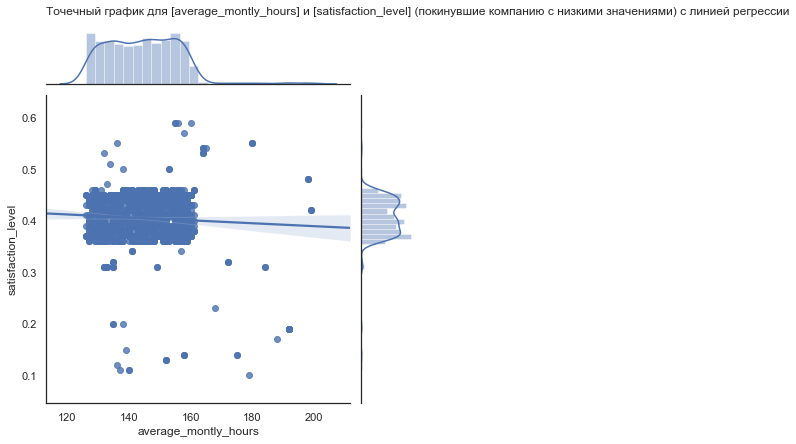

In [84]:
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_left_amh['average_montly_hours'], y=df_left_amh['satisfaction_level'], data=df_left_amh, kind='reg')
plt.title('Точечный график для [average_montly_hours] и [satisfaction_level] (покинувшие компанию с низкими значениями) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

#### Визуализируем связь атрибутов 'last_evaluation'(последняя оценка) и 'satisfaction_level'(уровень удовлетворенности)

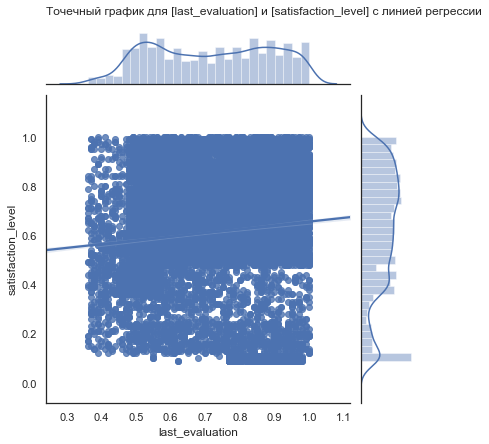

In [36]:
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_hr['last_evaluation'], y=df_hr['satisfaction_level'], data=df_hr, kind='reg')
plt.title('Точечный график для [last_evaluation] и [satisfaction_level] с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

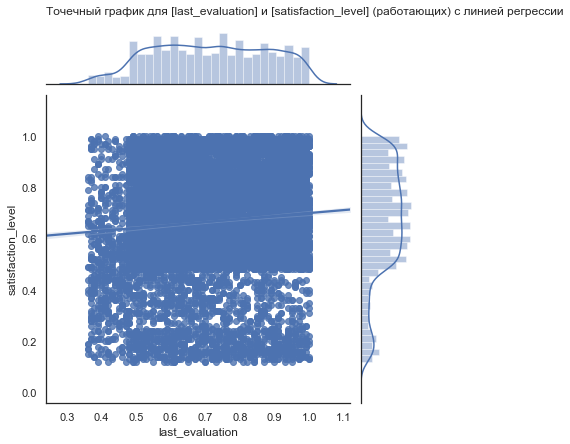

In [51]:
#работающие
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_work['last_evaluation'], y=df_work['satisfaction_level'], data=df_work, kind='reg')
plt.title('Точечный график для [last_evaluation] и [satisfaction_level] (работающих) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

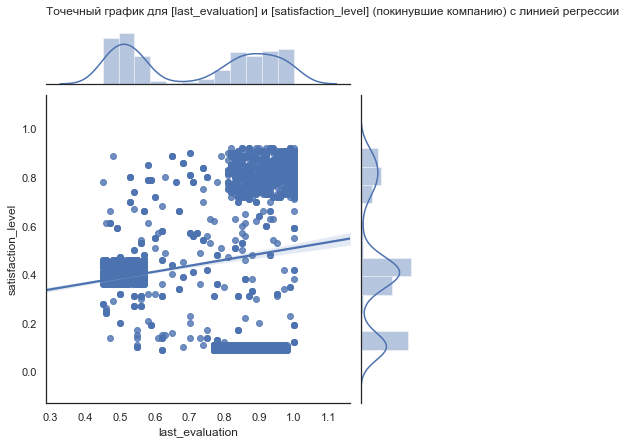

In [52]:
#покинувшие компанию
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_left['last_evaluation'], y=df_left['satisfaction_level'], data=df_left, kind='reg')
plt.title('Точечный график для [last_evaluation] и [satisfaction_level] (покинувшие компанию) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

визуально выделяется группа с низкими значениями (менее 0.6) атрибутов 'last_evaluation'(последней оценкой) и 'satisfaction_level'(уровень удовлетворенности), для которой можно проверить линейную связь

Проверим Коэффициент Пирсона

In [43]:
k_corr, p_value = pearsonr(df_hr['last_evaluation'], df_hr['satisfaction_level'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.10502121397148383
p value 4.704311558299351e-38


In [47]:
4.704311558299351e-38 < 0.05

True

так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **слабую прямую связь у атрибутов 'last_evaluation' и 'satisfaction_level'**

In [68]:
#работающие
k_corr, p_value = pearsonr(df_work['last_evaluation'], df_work['satisfaction_level'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.08635698525106214
p value 2.2875589386708473e-20


In [69]:
2.2875589386708473e-20 < 0.05

True

так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **очень слабую прямую связь у атрибутов 'last_evaluation' и 'satisfaction_level' для работающих сотрудников**

In [73]:
#покинувшие компанию

df_left_le = df_left [ (df_left['last_evaluation']<0.6) &  (df_left['satisfaction_level']<0.6) ]

k_corr, p_value = pearsonr(df_left_le['last_evaluation'], df_left_le['satisfaction_level'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.006237088289529092
p value 0.8043467577811348


In [71]:
4.671213569299269e-28 < 0.05

True

так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **очень слабую прямую связь у атрибутов 'last_evaluation' и 'satisfaction_level' для сотрудников, покинувших компанию, с низкими значениями этих атрибутов (менее 0.6)**

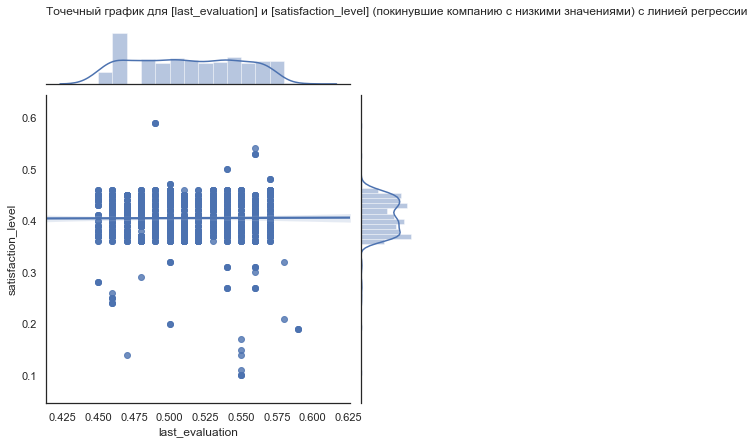

In [74]:
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_left_le['last_evaluation'], y=df_left_le['satisfaction_level'], data=df_left, kind='reg')
plt.title('Точечный график для [last_evaluation] и [satisfaction_level] (покинувшие компанию с низкими значениями) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

#### Визуализируем связь атрибутов 'last_evaluation'(последняя оценка) и 'average_montly_hours'(сред.ч. в мес)

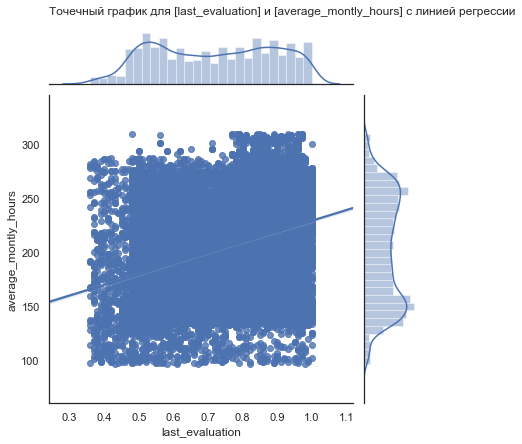

In [28]:
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_hr['last_evaluation'], y=df_hr['average_montly_hours'], data=df_hr, kind='reg')
plt.title('Точечный график для [last_evaluation] и [average_montly_hours] с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

посмотрим отдельно для работающих и покинувших компанию

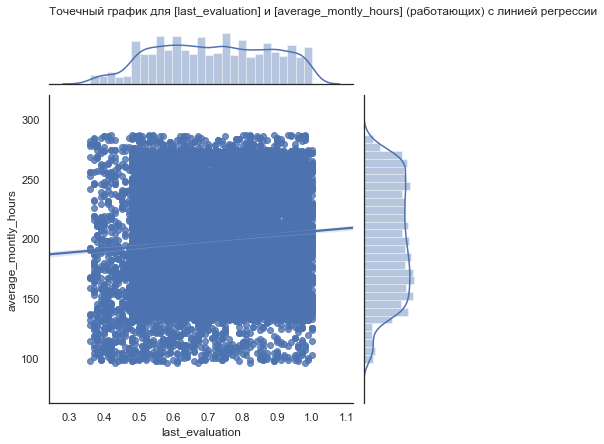

In [53]:
#работающие
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_work['last_evaluation'], y=df_work['average_montly_hours'], data=df_work, kind='reg')
plt.title('Точечный график для [last_evaluation] и [average_montly_hours] (работающих) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

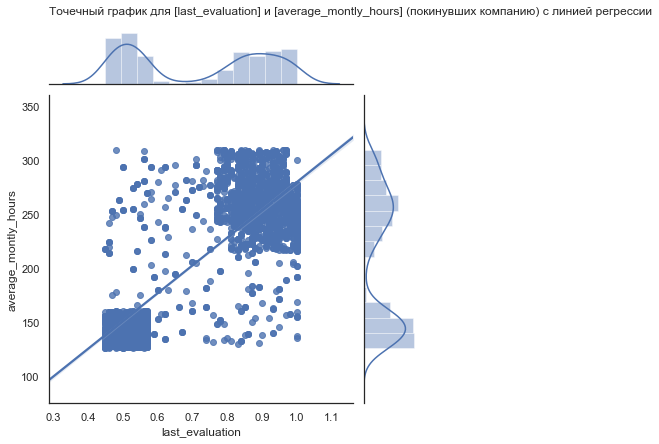

In [54]:
#покинувшие компанию
sns.set(style='white', color_codes=True)
g = sns.jointplot(x=df_left['last_evaluation'], y=df_left['average_montly_hours'], data=df_left, kind='reg')
plt.title('Точечный график для [last_evaluation] и [average_montly_hours] (покинувших компанию) с линией регрессии', fontsize=12, loc='left', pad=80)
plt.show()

у покинувших компанию выделяется 2 группы:
- с низкой оценкой и небольшим кол-м сред.ч. в мес
- с высокой оценкой и большим кол-м сред.ч. в мес

что логично, при большой нагрузке появляется опыт и знания, что может повысить послед оценку

Проверим коэффициент Пирсона

In [44]:
k_corr, p_value = pearsonr(df_hr['last_evaluation'], df_hr['average_montly_hours'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.33974179983835723
p value 0.0


так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **умеренную прямую связь у атрибутов 'last_evaluation' и 'average_montly_hours'**

In [55]:
#работающие
k_corr, p_value = pearsonr(df_work['last_evaluation'], df_work['average_montly_hours'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.09030389126924322
p value 3.951547332680549e-22


In [34]:
3.951547332680549e-22<0.05

True

так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **очень слабую прямую связь у атрибутов 'last_evaluation' и 'average_montly_hours' для работающих сотрудников**

In [56]:
#покинувшие компанию
k_corr, p_value = pearsonr(df_left['last_evaluation'], df_left['average_montly_hours'])
print('Коэффициент Пирсона', k_corr)
print('p value', p_value)

Коэффициент Пирсона 0.8303355847273907
p value 0.0


так как p_value меньше 0.05, то отклоняем нулевую гипотезу и принимаем альтернативную, то есть зависимость существует

значение коэффициента Пирсона показывает **высокую прямую связь у атрибутов 'last_evaluation' и 'average_montly_hours' для сотрудников, покинувших компанию**

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

Гипотезы:

- H0 **нулевая гипотеза** будет утверждать, что у двух исследуемых групп нет статистически значимой разницы, зависимы (коррелируют).
- H1 **альтернативная гипотеза** будет утверждать, что исследуемые группы статистически различны, независимы (отсутствует корреляция)

Допущение независимости предполагает, что представители двух выборок не составляют пары коррелирующих значений признака.

### гипотеза:  у атрибутов 'average_montly_hours'(сред.ч. в мес.) и 'satisfaction_level'(уровень удовлетворенности) нет статистически значимой разницы (коррелируют).

In [85]:
#проведем t-test двухвыборочный для независимых выборок
stats.ttest_ind(df_hr.average_montly_hours, df_hr.satisfaction_level)

Ttest_indResult(statistic=491.5064991295991, pvalue=0.0)

p_value меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **атрибуты 'average_montly_hours'(сред.ч. в мес.) и 'satisfaction_level'(уровень удовлетворенности) статистически различны** (корреляция отсутствует)

### гипотеза: у атрибутов  'last_evaluation'(последняя оценка) и 'satisfaction_level'(уровень удовлетворенности) нет статистически значимой разницы (коррелируют).¶

In [91]:
#проведем t-test двухвыборочный для независимых выборок
stats.ttest_ind(df_hr.last_evaluation, df_hr.satisfaction_level)

Ttest_indResult(statistic=41.89868154070206, pvalue=0.0)

p_value меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **атрибуты 'last_evaluation'(последняя оценка) и 'satisfaction_level'(уровень удовлетворенности) статистически различны** (корреляция отсутствует)

### гипотеза: у атрибутов 'last_evaluation'(последняя оценка) и 'average_montly_hours'(сред.ч. в мес) нет статистически значимой разницы (коррелируют).

In [94]:
#проведем t-test двухвыборочный для независимых выборок
stats.ttest_ind(df_hr.last_evaluation, df_hr.average_montly_hours)

Ttest_indResult(statistic=-491.25647025928, pvalue=0.0)

p_value меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **атрибуты 'last_evaluation'(последняя оценка) и 'average_montly_hours'(сред.ч. в мес) статистически различны** (корреляция отсутствует)

### 6. Рассчитать сколько работников работает в каждом департаменте.

In [66]:
df_ = df_hr['sales'].value_counts().reset_index()
df_

,index,sales
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


In [67]:
df_.style.bar()

,index,sales
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


### 7. Показать распределение сотрудников по зарплатам.

будем рассматривать только работающих сотрудников

'left' 1-уволен 0-работает

In [21]:
df_hr['left'].unique()

array([1, 0], dtype=int64)

In [22]:
df_hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [57]:
#процентное соотношение по зарплатам среди работающих сотрудников
df_work['salary'].value_counts(normalize=True)*100

low       45.012251
medium    44.880994
high      10.106755
Name: salary, dtype: float64

высокую('high') зарплату имеют только 10,1% сотрудников, и почти одинаковое кол-во сотрудников - 45% имеют низкую('low') и 44,8% среднюю('medium') зарплату

In [58]:
#распределение работающих сотрудников по зарплатам
df_work['salary'].value_counts()

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

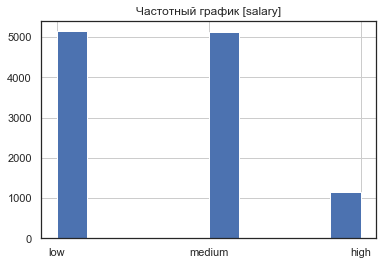

In [59]:
#гисторгамма
plt.title('Частотный график [salary]')
df_work['salary'].hist()

### 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

также будем рассматривать только работающих сотрудников

'left' 1-уволен 0-работает

#### по отделам в разрезе зарплат

In [60]:
#кол-во работающих сотрудников по отделам в разрезе зарплат
df_dep = df_work.pivot_table(index=['salary'], columns=['sales'], values='left', aggfunc='count', fill_value='', margins=True)
df_dep

sales,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
salary,,,,,,,,,,,
high,79,47,69,39,224,71,62,255,133,176,1155
low,437,309,259,243,121,276,346,1402,757,994,5144
medium,438,310,235,242,194,308,296,1469,784,853,5129
All,954,666,563,524,539,655,704,3126,1674,2023,11428


- высокую зарплату('high') большее кол-во сотрудников получает в отделах 'sales'(255) и 'management'(224), меньшее - в 'hr'(39)
- среднюю зарплату ('medium') большее кол-во сотрудников получает в отделах 'sales'(1469), 'technical'(853), 'support'(784), меньшее - в 'management'(194)
- низкую зарплату ('low') большее кол-во сотрудников также получает в отделах 'sales'(1402), 'technical'(994), 'support'(757), и меньшее - также в 'management'(121)


- по численности самый большой отдел 'sales'(3126) и второй большой отдел - 'technical'(2023)
- самый маленький по численности отдел 'hr'(524), также отдел 'management'(539)

**Heat map** позволяет посмотреть на распределение какого-то численного признака по двум категориальным. 

Визуализируем численность сотрудников по отделам и размер зарплат.

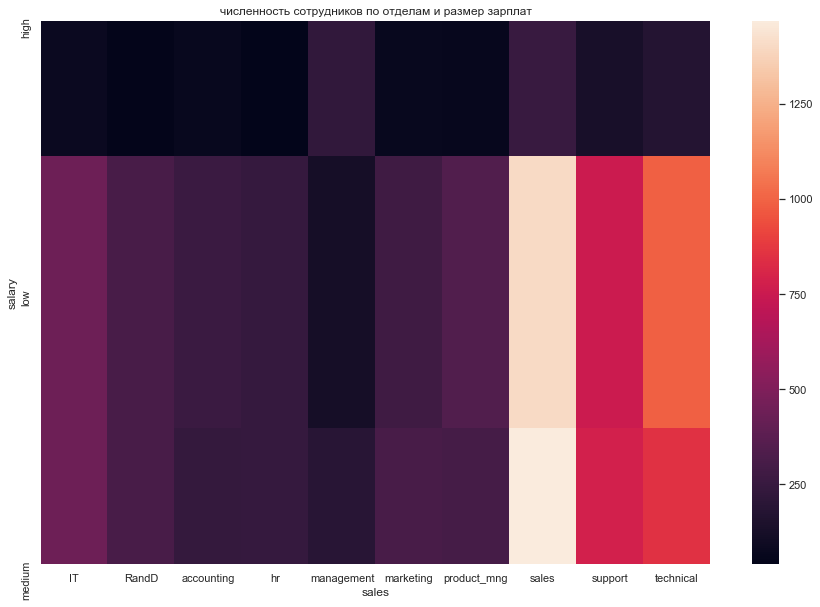

In [113]:
df_dep2 = df_work.pivot_table(index=['salary'], columns=['sales'], values='left', aggfunc='count', fill_value='')
plt.title('численность сотрудников по отделам и размер зарплат')
ax = sns.heatmap(df_dep2)

<BarContainer object of 10 artists>

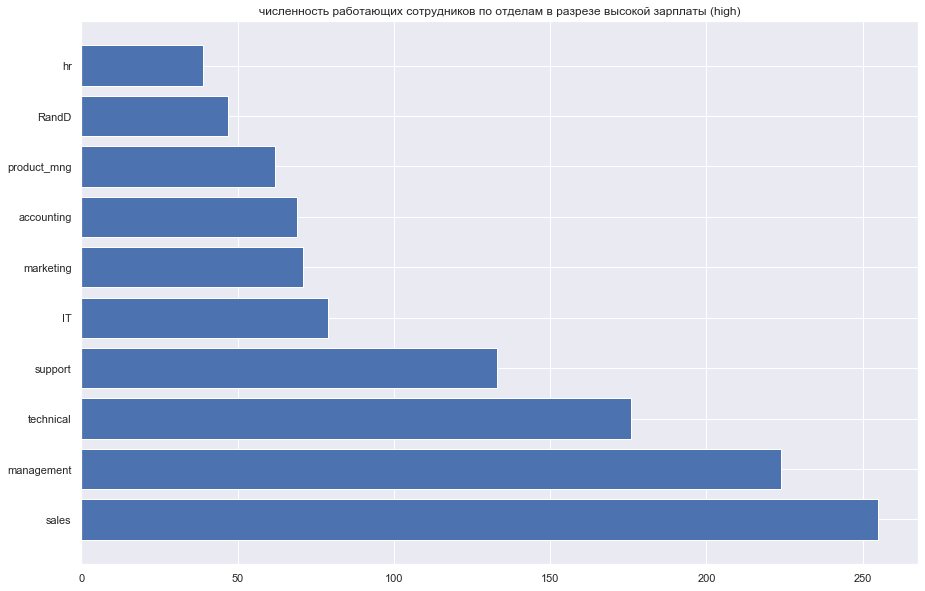

In [114]:
#кол-во работающих сотрудников по отделам в разрезе высокой зарплаты 'high'
df_work_h = df_work[df_work['salary']=='high'].groupby(['sales']).count().sort_values('salary', ascending=False).reset_index()
plt.title('численность работающих сотрудников по отделам в разрезе высокой зарплаты (high)')
plt.barh(df_work_h['sales'], df_work_h['salary'])
#df_work_h

<BarContainer object of 10 artists>

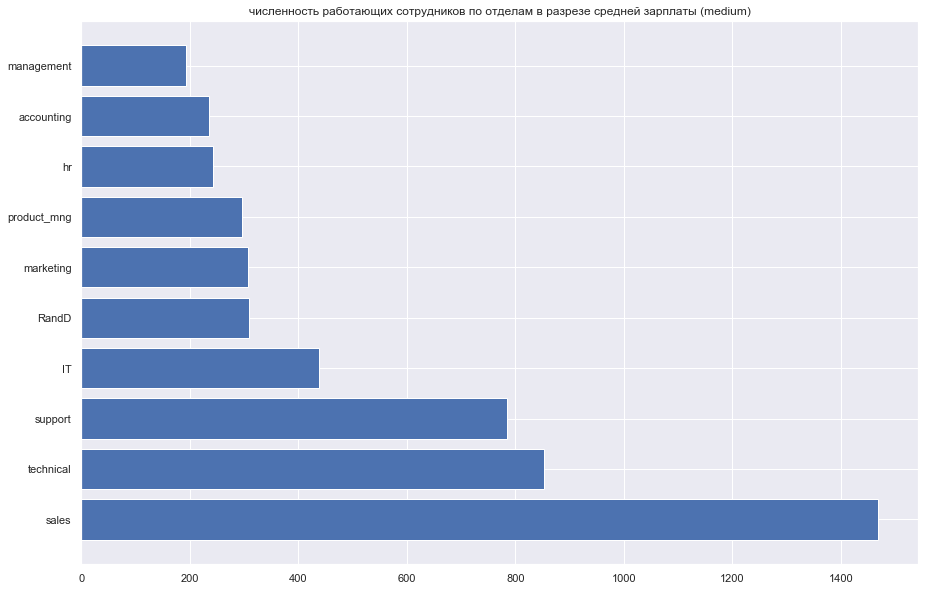

In [115]:
#кол-во работающих сотрудников по отделам в разрезе средней зарплаты 'medium'
df_work_m = df_work[df_work['salary']=='medium'].groupby(['sales']).count().sort_values('salary', ascending=False).reset_index()
plt.title('численность работающих сотрудников по отделам в разрезе средней зарплаты (medium)')
plt.barh(df_work_m['sales'], df_work_m['salary'])

<BarContainer object of 10 artists>

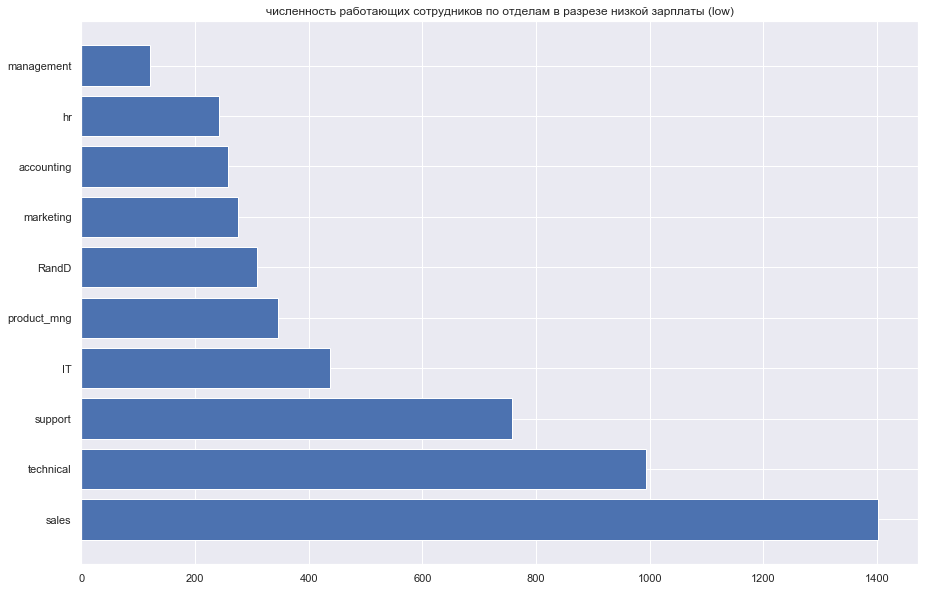

In [116]:
#кол-во работающих сотрудников по отделам в разрезе низкой зарплаты 'low'
df_work_l = df_work[df_work['salary']=='low'].groupby(['sales']).count().sort_values('salary', ascending=False).reset_index()
plt.title('численность работающих сотрудников по отделам в разрезе низкой зарплаты (low)')
plt.barh(df_work_l['sales'], df_work_l['salary'])

#### по отделам и проектам в разрезе зарплат

In [56]:
#кол-во работающих сотрудников по отделам и проектам в разрезе зарплат
df_pr = df_work.pivot_table(index=['salary','number_project'], columns=['sales'], values='left', aggfunc='count', fill_value='')
df_pr

sales                   IT  RandD  accounting   hr  management  marketing  \
salary number_project                                                       
high   2                 6      2           4    2          27          5   
       3                28     18          20   10          74         36   
       4                21     16          21   19          62         16   
       5                17      7          21    7          46         10   
       6                 7      4           3    1          15          4   
low    2                36     22          18   13           5         19   
       3               153    114          85   95          42         93   
       4               145     97          98   85          50        105   
       5                93     58          48   42          20         49   
       6                10     18          10    8           4         10   
medium 2                26     17          13   16          12         25   
       3               164    112          92  104          53        115   
       4               158     98          74   86          82        106   
       5                75     67          48   24          42         52   
       6                15     16           8   12           5         10   

sales                  product_mng  sales  support  technical  
salary number_project                                          
high   2                         4     19       10         15  
       3                        23     84       45         67  
       4                        24     91       43         53  
       5                         7     49       31         35  
       6                         4     12        4          6  
low    2                        40    113       48         64  
       3                       105    481      261        325  
       4                       123    480      283        372  
       5                        59    256      138        183  
       6                        19     72       27         50  
medium 2                        17    108       54         61  
       3                       107    509      274        294  
       4                        96    503      272        277  
       5                        51    276      157        181  
       6                        25     73       27         40

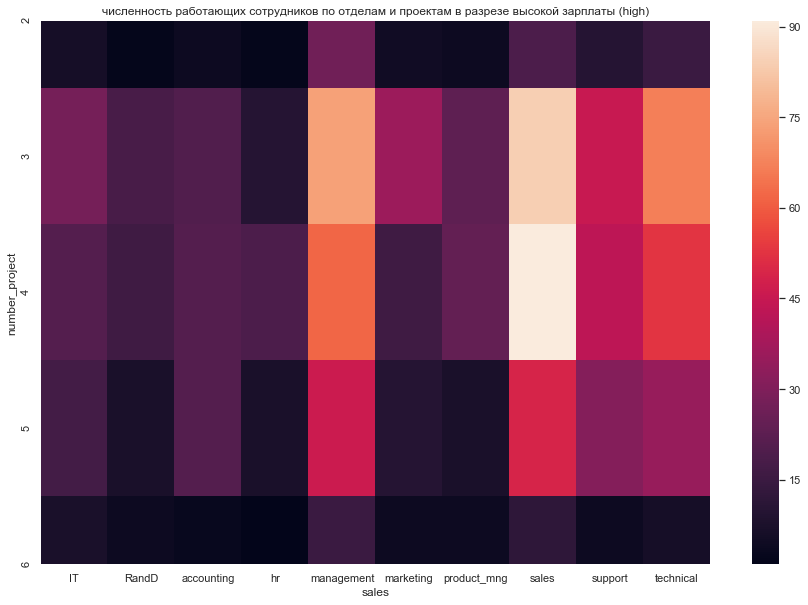

In [117]:
#кол-во работающих сотрудников по отделам и проектам в разрезе высокой зарплаты 'high'
df_pr_h = df_work[df_work['salary']=='high'].pivot_table(index=['number_project'], columns=['sales'], values='left', aggfunc='count', fill_value='')
plt.title('численность работающих сотрудников по отделам и проектам в разрезе высокой зарплаты (high)')
sns.heatmap(df_pr_h)

высокую зарплату('high') большее кол-во сотрудников из отдела 'sales' получает, работая на проектом 4(91) и 3(84) 

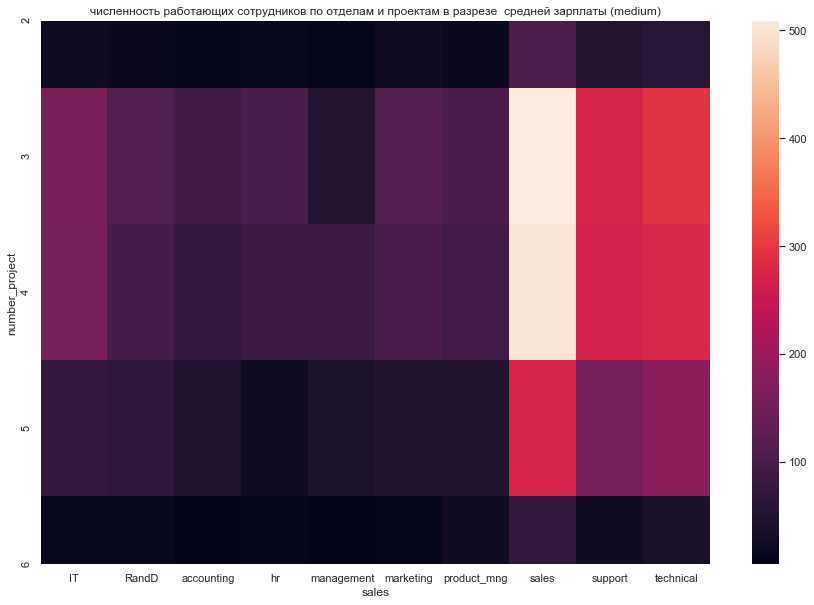

In [118]:
#кол-во работающих сотрудников по отделам и проектам в разрезе средней зарплаты 'medium'
df_pr_m = df_work[df_work['salary']=='medium'].pivot_table(index=['number_project'], columns=['sales'], values='left', aggfunc='count', fill_value='')
plt.title('численность работающих сотрудников по отделам и проектам в разрезе  средней зарплаты (medium)')
sns.heatmap(df_pr_m)

среднюю зарплату('medium') большее кол-во сотрудников также из отдела 'sales' получает, работая на проектом 3(509) и 4(504)

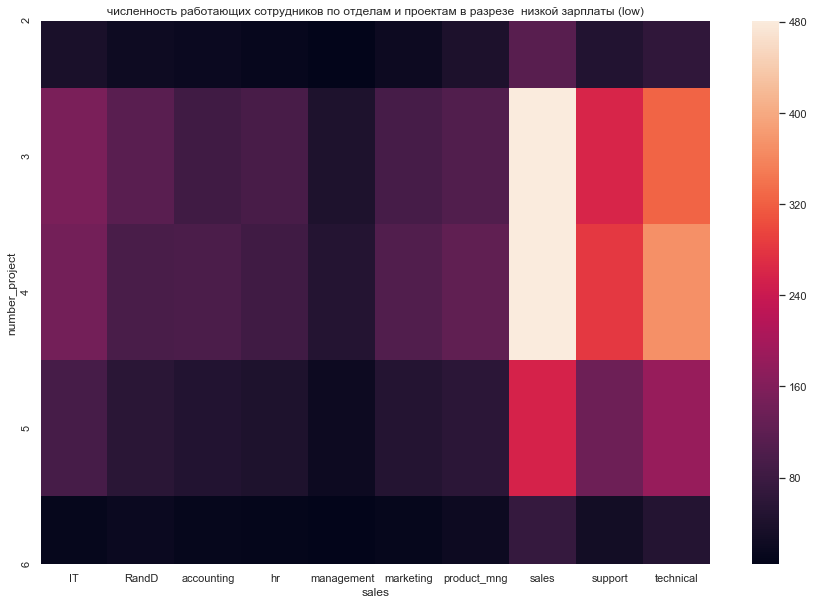

In [119]:
#кол-во работающих сотрудников по отделам и проектам в разрезе низкой зарплаты 'low'
df_pr_l = df_work[df_work['salary']=='low'].pivot_table(index=['number_project'], columns=['sales'], values='left', aggfunc='count', fill_value='')
plt.title('численность работающих сотрудников по отделам и проектам в разрезе  низкой зарплаты (low)')
sns.heatmap(df_pr_l)

низкую зарплату('low') большее кол-во сотрудников также из отдела 'sales' получает, работая на проектом 3(481) и 4(480)

проекты 3 и 4 ('number_project') самые высокооплачиваемые

### 9. Сколько сотрудников покинули компанию.

'left' 1-уволен 0-работает

In [61]:
#покинули компанию
len(df_left)

3571

всего сотрудников, покинувших компанию, равно 3571 

<BarContainer object of 10 artists>

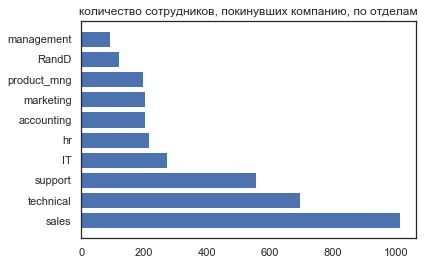

In [62]:
#кол-во сотрудников, покинувших компанию, по отделам
df_left_sales = df_left.groupby(['sales']).count().sort_values('salary', ascending=False).reset_index()
plt.title('количество сотрудников, покинувших компанию, по отделам')
plt.barh(df_left_sales['sales'], df_left_sales['salary'])

In [63]:
df_left_sales.reset_index()
df_left_sales[['sales','left']].style.bar()

,sales,left
0,sales,1014
1,technical,697
2,support,555
3,IT,273
4,hr,215
5,accounting,204
6,marketing,203
7,product_mng,198
8,RandD,121
9,management,91


больше всего сотрудников покидает отдел 'sales' (1014)

,index,left
0,0,11428
1,1,3571


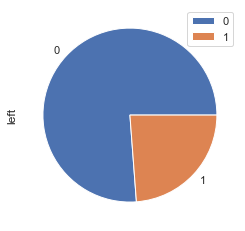

In [64]:
#соотношение работающих и покинувших компанию
df_wl = df_hr['left'].value_counts().reset_index()

df_wl.plot(kind='pie', y='left')
df_wl

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [86]:
!pip install researchpy

In [ ]:
import researchpy as rp

### гипотеза: Уровень удовлетворенности одинаковый, как у работающих, так и у покинувших компанию

- H0: Уровень удовлетворенности одинаковый, как у работающих, так и у покинувших компанию (Уровень удовлетворенности не является причиной ухода)
- H1: Уровень удовлетворенности отличается у работающих, и у покинувших компанию (Уровень удовлетворенности может быть причиной ухода)

In [77]:
#тест Шипиро-Уилка на норм. распределение
sts.shapiro(df_hr['satisfaction_level'])

(0.9518948793411255, 0.0)

p_value=0.0, это меньше 0.05, значит отклоняем нулевую гипотезу о том, что распределение нормально, и принимаем альтернативную - распределение атрибута 'satisfaction_level' отлично от нормального

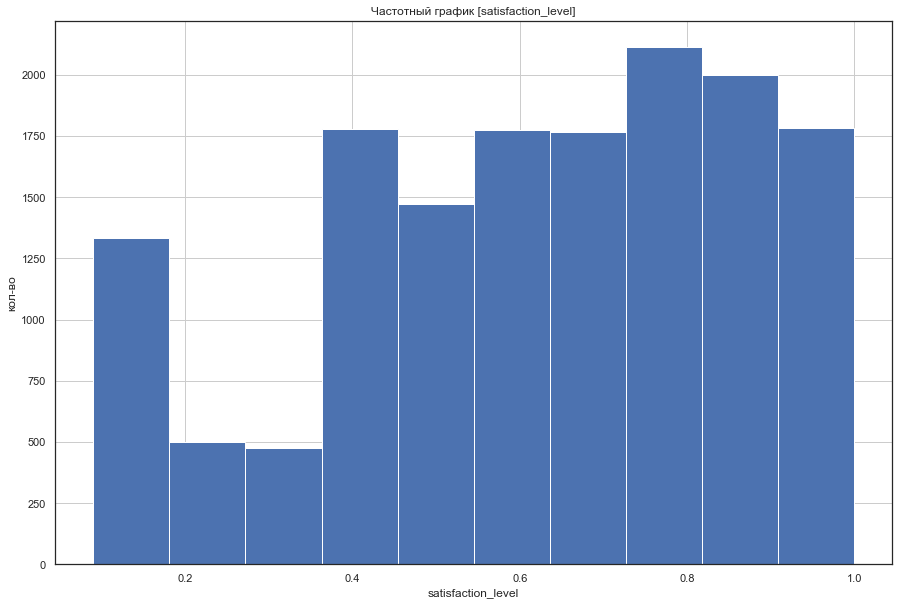

In [99]:
#гисторгамма
plt.xlabel('satisfaction_level')
plt.ylabel('кол-во')
plt.title('Частотный график [satisfaction_level]')
df_hr['satisfaction_level'].hist()

действительно, распределение отличается от нормального

In [79]:
#уровень удовлетворености уволеных
df_hr_left_sl = df_hr[ df_hr['left']==1 ]['satisfaction_level']
#уровень удовлетворености работающих
df_hr_work_sl = df_hr[ df_hr['left']==0 ]['satisfaction_level']

In [80]:
#определим размеры выборок
len(df_hr_left_sl), len(df_hr_work_sl)

(3571, 11428)

In [81]:
#уравняем размер выборок
df_hr_left_sl = df_hr_left_sl.sample(3570)
df_hr_work_sl = df_hr_work_sl.sample(3570)

In [82]:
#определим дисперсию выборок
statistics.variance(df_hr_left_sl), statistics.variance(df_hr_work_sl)

(0.0696799264205542, 0.04805401154353588)

In [83]:
#проведем t-test двухвыборочный для независимых выборок
print(stats.ttest_ind(df_hr_left_sl, df_hr_work_sl, equal_var=False))

Ttest_indResult(statistic=-39.7532523358529, pvalue=0.0)


p_value=0.0, это меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **уровень удовлетворенности 'satisfaction_level' может быть причиной ухода**.

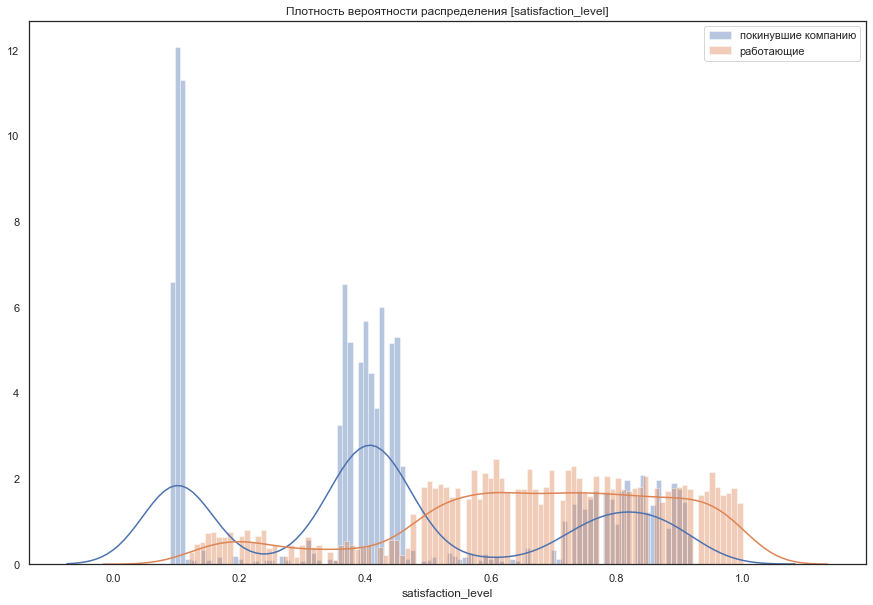

In [121]:
sns.distplot(df_hr_left_sl, 100)
sns.distplot(df_hr_work_sl, 100)
plt.title('Плотность вероятности распределения [satisfaction_level]')
plt.legend(['покинувшие компанию', 'работающие'])
plt.show()

визуально выборки действительно отличаются

In [90]:
# Showing descriptive statistics from researchpy.summary_cont()
rp.summary_cont(df_hr.groupby('left')['satisfaction_level'])

,N,Mean,SD,SE,95% Conf.,Interval
left,,,,,,
0,11428,0.666810,0.217104,0.002031,0.662829,0.670790
1,3571,0.440098,0.263933,0.004417,0.431440,0.448756


сред.зн. 'satisfaction_level' покинувших компанию меньше, чем у работающих сотрудников, поэтому протестируем следующую гипотезу

### гипотеза: У покинувших компанию сотрудников уровень удовлетворенности выше работающих 

- H0: У покинувших компанию сотрудников уровень удовлетворенности выше работающих
- H1: У покинувших компанию сотрудников уровень удовлетворенности ниже работающих

In [100]:
#уровень удовлетворености уволеных
df_hr_left_sl = df_hr[ df_hr['left']==1 ]['satisfaction_level']
#уровень удовлетворености работающих
df_hr_work_sl = df_hr[ df_hr['left']==0 ]['satisfaction_level']

In [103]:
#t-test
descriptives, results = rp.ttest(df_hr_work_sl, df_hr_left_sl)

In [102]:
print(descriptives)
print('_______________________________________')
print(results)

             Variable        N      Mean        SD        SE  95% Conf.  \
0  satisfaction_level   3571.0  0.440098  0.263933  0.004417   0.431438   
1  satisfaction_level  11428.0  0.666810  0.217104  0.002031   0.662829   
2            combined  14999.0  0.612834  0.248631  0.002030   0.608854   

   Interval  
0  0.448758  
1  0.670790  
2  0.616813  
_______________________________________
                                  Independent t-test     results
0  Difference (satisfaction_level - satisfaction_...     -0.2267
1                              Degrees of freedom =   14997.0000
2                                               t =     -51.6128
3                           Two side test p value =       0.0000
4                          Difference < 0 p value =       0.0000
5                          Difference > 0 p value =       1.0000
6                                       Cohen's d =      -0.9895
7                                       Hedge's g =      -0.9894
8                 

p_value=0.0, это меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **у покинувших компанию сотрудников уровень удовлетворенности 'satisfaction_level' ниже работающих.**

### гипотеза: Повышения за послед 5 лет одинаковое, как у работающих, так и у покинувших компанию

- H0: Повышения за послед 5 лет одинаковое, как у работающих, так и у покинувших компанию (отсутствие повышения не является причиной ухода)
- H1: Повышения за послед 5 лет отличается у работающих и у покинувших компанию (отсутствие повышения может быть причиной ухода)

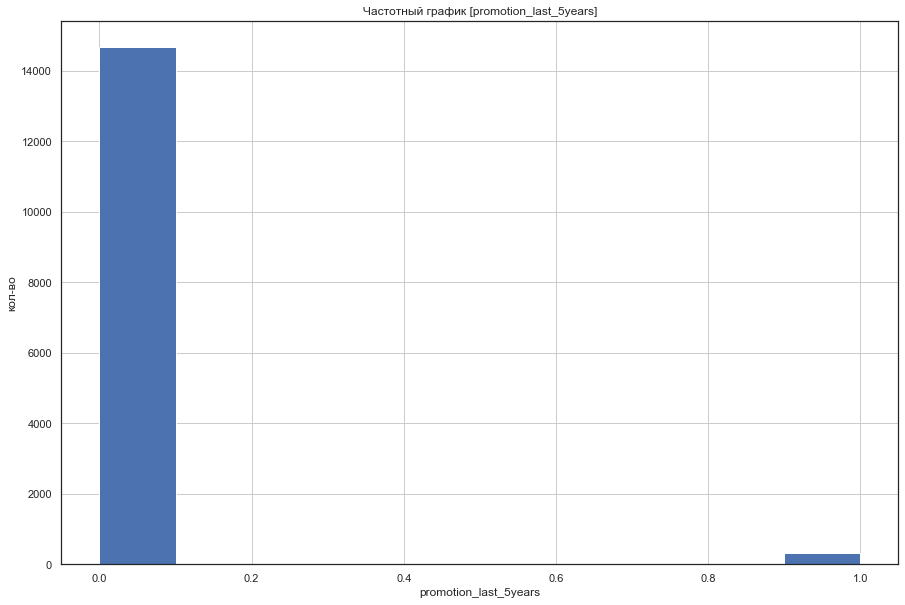

In [100]:
#гисторгамма
plt.xlabel('promotion_last_5years')
plt.ylabel('кол-во')
plt.title('Частотный график [promotion_last_5years]')
df_hr['promotion_last_5years'].hist()

распределение атрибута 'promotion_last_5years' является распределением Бернули (значения 1 или 0)

In [63]:
#повышение уволеных
df_hr_left_p = df_hr[ df_hr['left']==1 ]['promotion_last_5years']
#повышение работающих
df_hr_work_p = df_hr[ df_hr['left']==0 ]['promotion_last_5years']

In [64]:
#определим размеры выборок
len(df_hr_left_p), len(df_hr_work_p)

(3571, 11428)

In [65]:
#уравняем размер выборок
df_hr_left_p = df_hr_left_p.sample(3570)
df_hr_work_p = df_hr_work_p.sample(3570)

In [66]:
#определим дисперсию выборок
statistics.variance(df_hr_left_p), statistics.variance(df_hr_work_p)

(0.005295287069717212, 0.024315279488091115)

In [67]:
#проведем t-test двухвыборочный для независимых выборок
print(stats.ttest_ind(df_hr_left_p, df_hr_work_p, equal_var=False))

Ttest_indResult(statistic=-6.808329616728164, pvalue=1.1023945902867444e-11)


In [68]:
1.1023945902867444e-11<0.05

True

p_value=1.1023945902867444e-11, это меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **отсутствие повышения может быть причиной ухода**.

Посмотрим стаж работы у сотрудников, покинувших компанию

<BarContainer object of 5 artists>

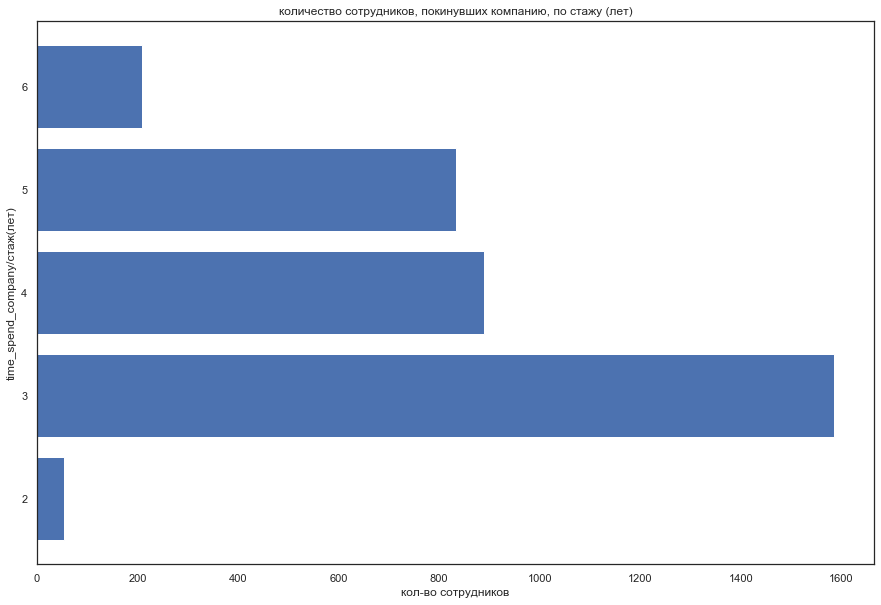

In [106]:
#кол-во сотрудников, покинувших компанию, по стажу(лет)
df_left_t = df_hr_left.groupby(['time_spend_company']).count().sort_values('left', ascending=False).reset_index()
#df_left_t['time_spend_company'] =  df_left_t.time_spend_company.astype('object')

plt.xlabel('кол-во сотрудников')
plt.ylabel('time_spend_company/стаж(лет)')
plt.title('количество сотрудников, покинувших компанию, по стажу (лет)')
plt.barh(df_left_t['time_spend_company'], df_left_t['left'])

In [107]:
df_left_t[['time_spend_company', 'left']]

,time_spend_company,left
0,3,1586
1,4,890
2,5,833
3,6,209
4,2,53


большее кол-во сотрудников (1586) покидают компанию со стажем 3 года, также после 4 лет работы (890) и 5 лет (833)

### гипотеза: Последняя оценка работающих и покинувших компанию равны

- H0: Последняя оценка работающих и покинувших компанию равны (последняя оценка не является причиной ухода)
- H1: Последняя оценка работающих и покинувших компанию отличается (последняя оценка может является причиной ухода)

In [40]:
#тест Шипиро-Уилка на норм. распределение
sts.shapiro(df_hr['last_evaluation'])

C:\ProgramData\Anaconda37\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9522111415863037, 0.0)

In [145]:
k2, p = stats.normaltest(df_hr['last_evaluation'])
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("Не нормальное распределение для alpha = ", alpha)
else:
    print("Нормальное распределение для alpha = ", alpha)

p = 0
Не нормальное распределение для alpha =  0.05


p_value=0.0, это меньше 0.05, значит отклоняем нулевую гипотезу о том, что распределение нормально, и принимаем альтернативную - **распределение атрибута 'last_evaluation' отлично от нормального**

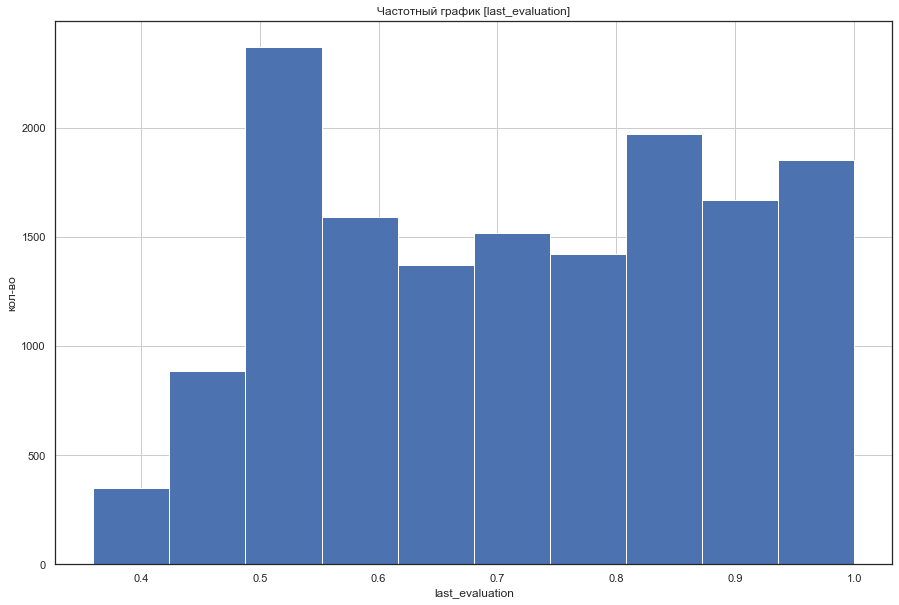

In [109]:
#гисторгамма
plt.xlabel('last_evaluation')
plt.ylabel('кол-во')
plt.title('Частотный график [last_evaluation]')
df_hr['last_evaluation'].hist()

действительно, визуально распределение отличается от нормального

In [42]:
#оценка уволеных
df_hr_left_ev = df_hr[ df_hr['left']==1 ]['last_evaluation']
#оценка работающих
df_hr_work_ev = df_hr[ df_hr['left']==0 ]['last_evaluation']

In [43]:
#определим размеры выборок
len(df_hr_left_ev), len(df_hr_work_ev)

(3571, 11428)

In [44]:
#уравняем размер выборок
df_hr_left_ev = df_hr_left_ev.sample(3570)
df_hr_work_ev = df_hr_work_ev.sample(3570)

In [45]:
#определим дисперсию выборок
statistics.variance(df_hr_left_ev), statistics.variance(df_hr_work_ev)

(0.0390792385802738, 0.026981033565569683)

In [47]:
#проведем t-test двухвыборочный для независимых выборок
print(stats.ttest_ind(df_hr_left_ev, df_hr_work_ev, equal_var=False))

Ttest_indResult(statistic=0.029302739649668497, pvalue=0.9766239885938233)


p_value=0.9766239885938233, это больше 0.05, значит недостаточно оснований отклонить нулевую гипотезу, и **последняя оценка не является причиной ухода**.

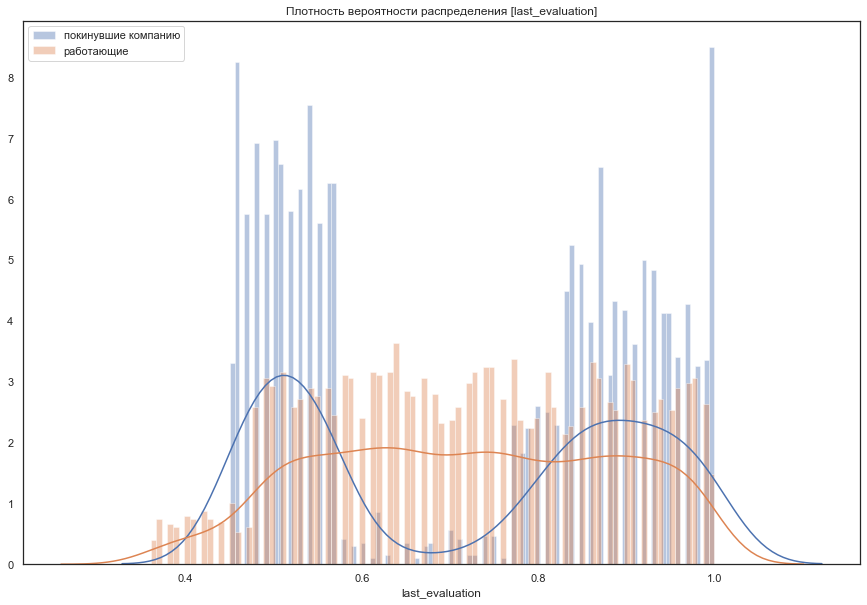

In [123]:
sns.distplot(df_hr_left_ev, 100)
sns.distplot(df_hr_work_ev, 100)
plt.title('Плотность вероятности распределения [last_evaluation]')
plt.legend(['покинувшие компанию', 'работающие'])
plt.show()

покидают компанию в основном или с высокой оценкой, или с низкой, у работающих - нет явных пиков, но тест не показал статистически значемое различие выборок

### гипотеза: Количество сред. ч. в месяц работающих и покинувших компанию равно

- H0: Количество сред. ч. в месяц работающих и покинувших компанию равны (нагрузка не является причиной ухода)
- H1: Количество сред. ч. в месяц работающих и покинувших компанию отличается (нагрузка может является причиной ухода)

In [84]:
#тест Шипиро-Уилка на норм. распределение
sts.shapiro(df_hr['average_montly_hours'])

(0.963361382484436, 0.0)

p_value=0.0, это меньше 0.05, значит отклоняем нулевую гипотезу о том, что распределение нормально, и принимаем альтернативную - распределение атрибута 'average_montly_hours' отлично от нормального

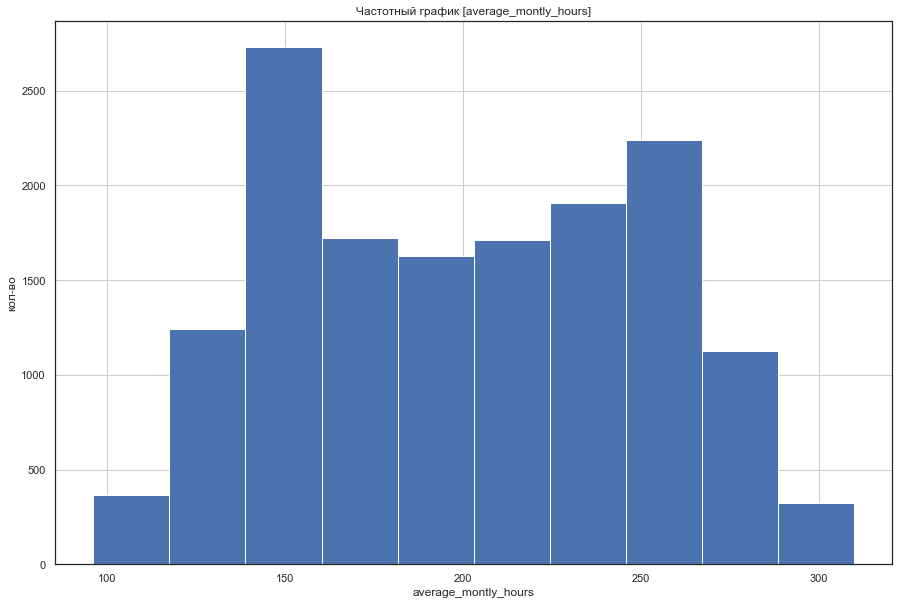

In [110]:
#гисторгамма
plt.xlabel('average_montly_hours')
plt.ylabel('кол-во')
plt.title('Частотный график [average_montly_hours]')
df_hr['average_montly_hours'].hist()

действительно, распределение отличается от нормального

In [87]:
#нагрузка уволеных
df_hr_left_h = df_hr[ df_hr['left']==1 ]['average_montly_hours']
#нагрузка работающих
df_hr_work_h = df_hr[ df_hr['left']==0 ]['average_montly_hours']

In [88]:
#определим размеры выборок
len(df_hr_left_h), len(df_hr_work_h)

(3571, 11428)

In [89]:
#уравняем размер выборок
df_hr_left_h = df_hr_left_h.sample(3570)
df_hr_work_h = df_hr_work_h.sample(3570)

In [90]:
#определим дисперсию выборок
statistics.variance(df_hr_left_h), statistics.variance(df_hr_work_h)

(3746.1508825216833, 2083.713790004654)

In [91]:
#проведем t-test двухвыборочный для независимых выборок
print(stats.ttest_ind(df_hr_left_h, df_hr_work_h, equal_var=False))

Ttest_indResult(statistic=6.089321391304383, pvalue=1.1975902840617287e-09)


In [92]:
1.1975902840617287e-09<0.05

True

p_value=1.1023945902867444e-11, это меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **нагрузка (сред.ч. в мес.) может быть причиной ухода**.

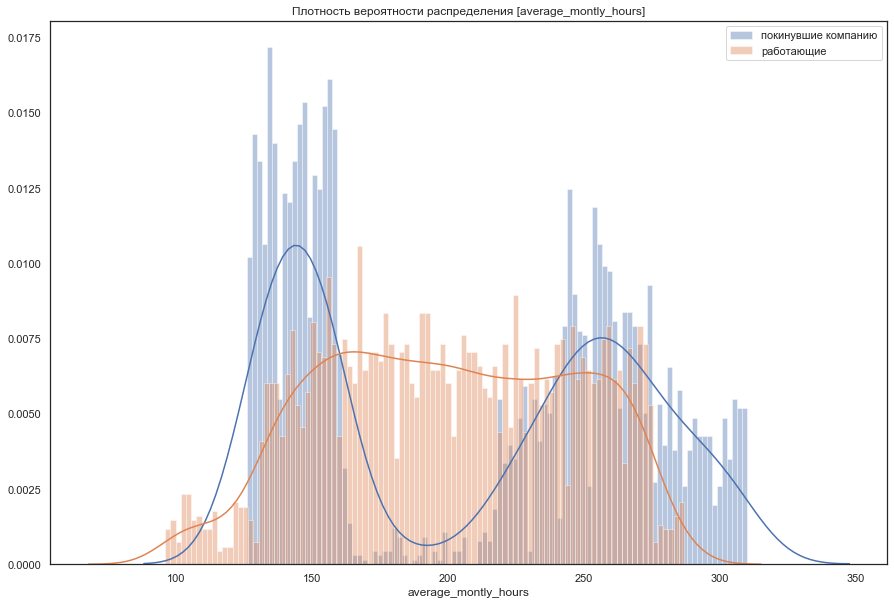

In [125]:
sns.distplot(df_hr_left_h, 100)
sns.distplot(df_hr_work_h, 100)
plt.title('Плотность вероятности распределения [average_montly_hours]')
plt.legend(['покинувшие компанию', 'работающие'])
plt.show()

In [118]:
#кол-во сотрудников, покинувших компанию, по отделам и нагрузке
df_left_av = df_hr_left.groupby(['sales','average_montly_hours']).count().sort_values('left', ascending=False).reset_index()
df_left_av[['sales','average_montly_hours', 'left']]

,sales,average_montly_hours,left
0,sales,156,31
1,sales,135,28
2,sales,159,25
3,sales,147,24
4,sales,140,21
...,...,...,...
874,hr,252,1
875,product_mng,244,1
876,hr,249,1
877,hr,247,1


выше уже определяли, что покидают компанию в основном сотрудники отдела 'sales', на таблице видно, что большинство покидает при нагрузке выше 140 сред.ч. в мес

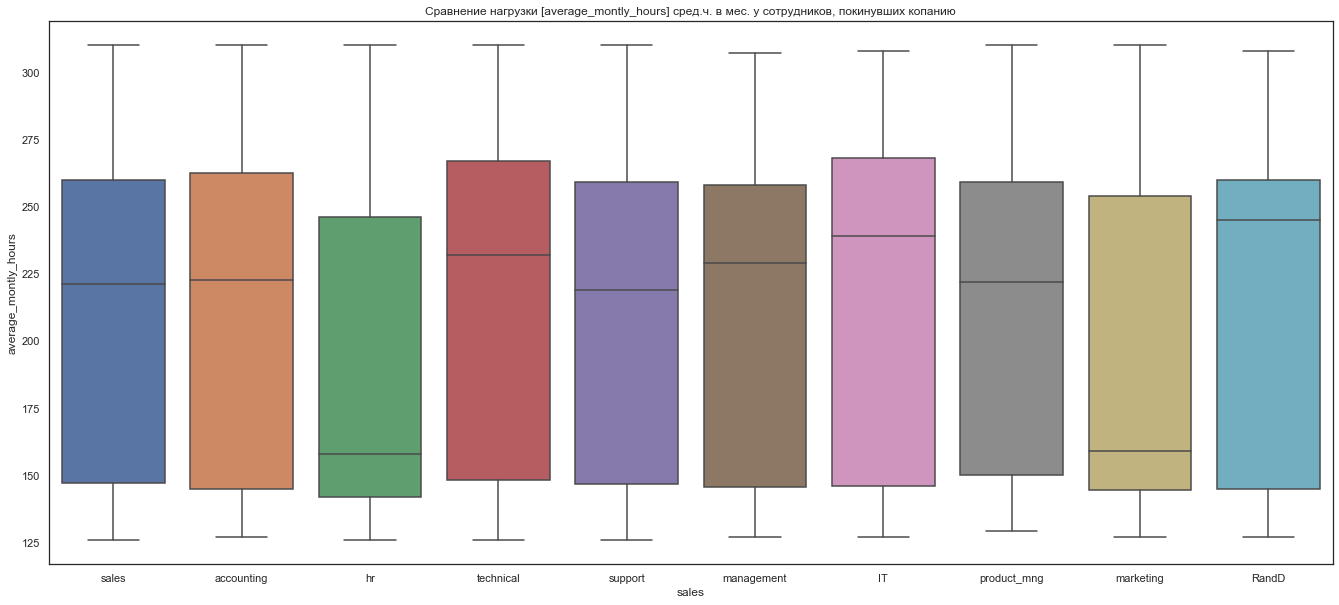

In [137]:
plt.rcParams['figure.figsize']=(23,10)
plt.title('Сравнение нагрузки [average_montly_hours] сред.ч. в мес. у сотрудников, покинувших копанию')
ax = sns.boxplot(x='sales', y='average_montly_hours', data=df_hr_left)

### гипотеза: Несчастные случаи работающих и покинувших компанию равны

- H0: Несчастные случаи работающих и покинувших компанию равны (несчастный случай не является причиной ухода)
- H1: Несчастные случаи работающих и покинувших компанию отличаются (несчастный случай может является причиной ухода)

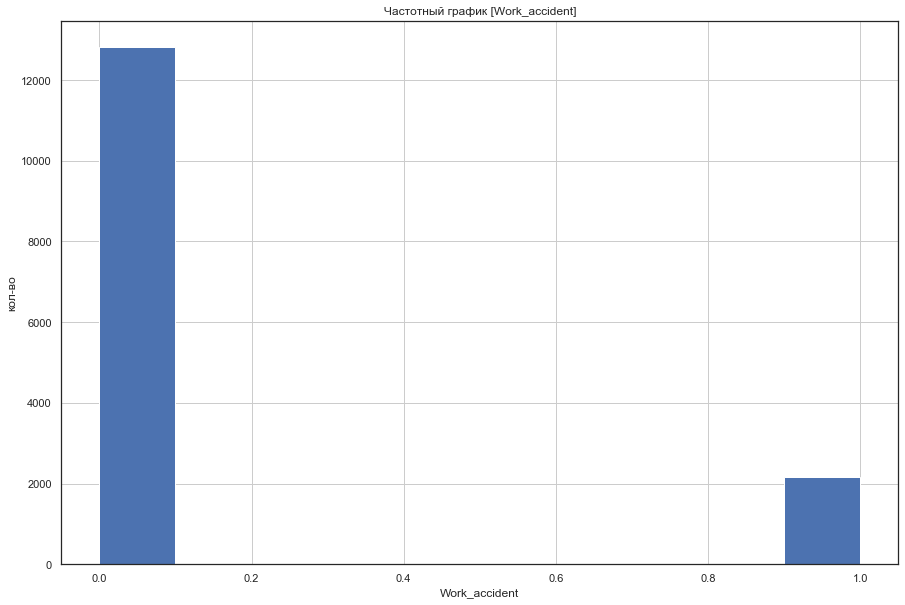

In [126]:
#гисторгамма
plt.xlabel('Work_accident')
plt.ylabel('кол-во')
plt.title('Частотный график [Work_accident]')
df_hr['Work_accident'].hist()

распределение атрибута 'Work_accident' является распределением Бернули (значения 1 или 0)

In [127]:
#несч. случай у уволеных
df_hr_left_ac = df_hr[ df_hr['left']==1 ]['Work_accident']
#несч. случай у работающих
df_hr_work_ac = df_hr[ df_hr['left']==0 ]['Work_accident']

In [128]:
#определим размеры выборок
len(df_hr_left_ac), len(df_hr_work_ac)

(3571, 11428)

In [129]:
#уравняем размер выборок
df_hr_left_ac = df_hr_left_ac.sample(3570)
df_hr_work_ac = df_hr_work_ac.sample(3570)

In [130]:
#определим дисперсию выборок
statistics.variance(df_hr_left_ac), statistics.variance(df_hr_work_ac)

(0.04511059677443406, 0.14373138440021566)

In [131]:
#проведем t-test двухвыборочный для независимых выборок
print(stats.ttest_ind(df_hr_left_ac, df_hr_work_ac, equal_var=False))

Ttest_indResult(statistic=-17.40824750535881, pvalue=3.8165513987524295e-66)


In [132]:
3.8165513987524295e-66 < 0.05

True

p_value=3.8165513987524295e-66, это меньше 0.05, значит отвергаем нулевую гипотезу, и принимаем альтернативную, то есть **несчастный случай на работе может быть причиной ухода**.